In [1]:
#Load Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
import plotly.express as px
from collections import Counter
import collections
import math

data = pd.read_csv('/kaggle/input/masters-data/masters_data.csv')
data2024 = data.loc[data['Year'] == 2024]
print(data2024)
data = data.loc[data['Year'] < 2024]  # Data for all years except 2024

data2024 = data2024[data2024['Player Name'].isin(data['Player Name'])]
missing_values = data.isna().mean() * 100
print(missing_values)
print(data.loc[data['Player Name'] == 'Rory McIlroy'])
print(data.shape)

           Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
10         Adam Hadwin     70.808  2024              5.0                 0.0   
17         Adam Schenk     71.551  2024              1.0                 0.0   
35          Adam Scott     70.012  2024              3.0                 0.0   
39       Akshay Bhatia     70.171  2024              3.0                 1.0   
41      Austin Eckroat     70.676  2024              2.0                 1.0   
..                 ...        ...   ...              ...                 ...   
728     Viktor Hovland     70.630  2024              2.0                 0.0   
732     Will Zalatoris     70.862  2024              3.0                 0.0   
738      Wyndham Clark     70.294  2024              7.0                 1.0   
746  Xander Schauffele     68.914  2024             13.0                 2.0   
764       Zach Johnson     70.695  2024              NaN                 NaN   

     Drive Avg %_of_fairways_hit  Putts

In [2]:
# Striping T and converting to numeric
data['Masters Finish'] = data['Masters Finish'].astype(str).str.lstrip('T')
data['Masters Finish'] = data['Masters Finish'].replace(np.nan, '100')
data['Masters Finish'] = pd.to_numeric(data['Masters Finish'], errors='coerce')
print(data)


      Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
0     Adam Hadwin        NaN  2011              2.0                 0.0   
1     Adam Hadwin     71.021  2015              3.0                 0.0   
2     Adam Hadwin     70.719  2016              2.0                 0.0   
3     Adam Hadwin     70.583  2017              5.0                 1.0   
4     Adam Hadwin     70.750  2018              3.0                 0.0   
..            ...        ...   ...              ...                 ...   
759  Zach Johnson     70.644  2019              1.0                 0.0   
760  Zach Johnson     70.388  2020              1.0                 0.0   
761  Zach Johnson     70.401  2021              3.0                 0.0   
762  Zach Johnson     71.174  2022              NaN                 NaN   
763  Zach Johnson     71.274  2023              NaN                 NaN   

     Drive Avg %_of_fairways_hit  Putts per round   GIR % Scramble %  ...  \
0          NaN        

In [3]:
masters_winners = data.loc[data['Masters Finish'] == 1]
print(masters_winners)

median_putts_per_round = round(masters_winners['Putts per round'].mean(), 2)
print(f"Median Putts per Round: {median_putts_per_round}")

data.loc[498, 'Putts per round'] = median_putts_per_round

print("Updated DataFrame for row 494:")
print(data.loc[498])


           Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
24          Adam Scott     69.300  2013              6.0                 2.0   
78        Bubba Watson     69.639  2012              7.0                 1.0   
80        Bubba Watson     69.712  2014              8.0                 2.0   
134   Charl Schwartzel     69.619  2011              3.0                 1.0   
174      Danny Willett        NaN  2016              3.0                 1.0   
203     Dustin Johnson     69.619  2021              9.0                 1.0   
326           Jon Rahm     69.037  2023             10.0                 4.0   
330      Jordan Spieth     68.938  2015             15.0                 5.0   
498       Patrick Reed     70.106  2018              7.0                 1.0   
513     Phil Mickelson        NaN   201              NaN                 NaN   
591  Scottie Scheffler     69.293  2022             11.0                 4.0   
610      Sergio Garcia     69.596  2017 

In [4]:
winner_2008 = data[(data['Year'] == 2012) & (data['Masters Finish'] == 1)]
print(winner_2008)

     Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
78  Bubba Watson     69.639  2012              7.0                 1.0   

    Drive Avg %_of_fairways_hit  Putts per round  GIR % Scramble %  ...  \
78      315.5             58.84            29.73  69.95      56.58  ...   

   Total Strokes Gained  SG:OTT  SG:ARG  SG:TTG  SG:APG  SG:PUTT  Par 3 Score  \
78                1.529   1.485   0.059   1.809   0.265    -0.28         3.13   

    Par 4 score  Par 5 score  Masters Finish  
78         3.98         4.51             1.0  

[1 rows x 21 columns]


In [5]:
data = data.dropna()
print(data.shape)

(230, 21)


In [6]:
converted_winners = data.loc[data['Masters Finish'] == 1]
print(converted_winners)

           Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
24          Adam Scott     69.300  2013              6.0                 2.0   
78        Bubba Watson     69.639  2012              7.0                 1.0   
80        Bubba Watson     69.712  2014              8.0                 2.0   
134   Charl Schwartzel     69.619  2011              3.0                 1.0   
203     Dustin Johnson     69.619  2021              9.0                 1.0   
326           Jon Rahm     69.037  2023             10.0                 4.0   
330      Jordan Spieth     68.938  2015             15.0                 5.0   
498       Patrick Reed     70.106  2018              7.0                 1.0   
591  Scottie Scheffler     69.293  2022             11.0                 4.0   
610      Sergio Garcia     69.596  2017              3.0                 1.0   

     Drive Avg %_of_fairways_hit  Putts per round   GIR % Scramble %  ...  \
24       297.8             61.84          

In [7]:
def top_10(pos):
    try:
        pos = int(pos)
        if pos <= 10:
            return 1
        else:
            return 0
    except ValueError:
        return 0

data['top_10_masters'] = data['Masters Finish'].apply(top_10)

top_10_rows = data[data['top_10_masters'] == 1]
print(top_10_rows.head())

      Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
22     Adam Scott     69.872  2011              7.0                 1.0   
23     Adam Scott     69.533  2012              5.0                 0.0   
24     Adam Scott     69.300  2013              6.0                 2.0   
28     Adam Scott     69.996  2017              4.0                 0.0   
60  Brooks Koepka     69.395  2019              9.0                 3.0   

    Drive Avg %_of_fairways_hit  Putts per round  GIR % Scramble %  ...  \
22      299.7             63.98            29.39  68.08      59.00  ...   
23      304.6             59.61            29.53  66.57      55.87  ...   
24      297.8             61.84            29.52  68.80      56.38  ...   
28      307.0             56.65            29.36  67.05      58.43  ...   
60      309.0             61.83            28.86  69.97      62.25  ...   

   SG:OTT  SG:ARG  SG:TTG  SG:APG  SG:PUTT  Par 3 Score  Par 4 score  \
22  0.793  -0.013   0.882 

In [8]:
data2024 = data2024.drop('Masters Finish', axis = 1)
print(data2024)

           Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
10         Adam Hadwin     70.808  2024              5.0                 0.0   
17         Adam Schenk     71.551  2024              1.0                 0.0   
35          Adam Scott     70.012  2024              3.0                 0.0   
39       Akshay Bhatia     70.171  2024              3.0                 1.0   
41      Austin Eckroat     70.676  2024              2.0                 1.0   
..                 ...        ...   ...              ...                 ...   
728     Viktor Hovland     70.630  2024              2.0                 0.0   
732     Will Zalatoris     70.862  2024              3.0                 0.0   
738      Wyndham Clark     70.294  2024              7.0                 1.0   
746  Xander Schauffele     68.914  2024             13.0                 2.0   
764       Zach Johnson     70.695  2024              NaN                 NaN   

     Drive Avg %_of_fairways_hit  Putts

In [9]:
data2024 = data2024.dropna()
print(data2024.head())
print(data2024.shape)

       Player Name  Avg_score  Year  Top 10 Finishes  1st Place Finishes  \
10     Adam Hadwin     70.808  2024              5.0                 0.0   
17     Adam Schenk     71.551  2024              1.0                 0.0   
35      Adam Scott     70.012  2024              3.0                 0.0   
39   Akshay Bhatia     70.171  2024              3.0                 1.0   
41  Austin Eckroat     70.676  2024              2.0                 1.0   

    Drive Avg %_of_fairways_hit  Putts per round   GIR % Scramble %  \
10      296.8            61.43%            28.51  64.25%     56.76%   
17      300.8            61.58%            28.89  64.79%     59.06%   
35      305.8            57.63%            28.67  66.31%     60.99%   
39      299.4            65.26%            28.59  66.60%     61.83%   
41      300.0            66.99%            28.69  64.26%     57.14%   

   Bounce_Back %  Total Strokes Gained  SG:OTT  SG:ARG  SG:TTG  SG:APG  \
10        18.00%                 0.212   0

In [10]:
#Checking which columns need converted to numerical
categorical_columns = data2024.select_dtypes(include = ['object', 'category'])
print(categorical_columns)


#Drop percentage sign in certain columns
columns_to_convert = ['%_of_fairways_hit', 'GIR %', 'Scramble %', 'Bounce_Back %']

data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.astype(str).str.rstrip('%'))
data2024[columns_to_convert] = data2024[columns_to_convert].apply(lambda x: x.str.rstrip('%'))

#Convert column to float
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors = 'coerce')
data2024[columns_to_convert] = data2024[columns_to_convert].apply(pd.to_numeric, errors = 'coerce')
categorical_columns = data.select_dtypes(include = ['object', 'category'])
print(categorical_columns)
top_10_counts = data['top_10_masters'].value_counts()

           Player Name %_of_fairways_hit   GIR % Scramble % Bounce_Back %
10         Adam Hadwin            61.43%  64.25%     56.76%        18.00%
17         Adam Schenk            61.58%  64.79%     59.06%        22.64%
35          Adam Scott            57.63%  66.31%     60.99%        20.75%
39       Akshay Bhatia            65.26%  66.60%     61.83%        27.04%
41      Austin Eckroat            66.99%  64.26%     57.14%        17.13%
54        Brian Harman            65.76%  65.26%     61.94%        23.96%
98       Byeong Hun An            53.83%  67.74%     57.58%        24.04%
104          Cam Davis            60.81%  63.46%     58.03%        21.90%
117      Cameron Young            59.93%  66.45%     59.35%        24.54%
158         Chris Kirk            63.21%  64.64%     60.10%        15.17%
164    Collin Morikawa            70.36%  64.76%     65.88%        27.70%
172      Corey Conners            64.65%  69.97%     57.14%        23.23%
188     Denny McCarthy            61.6

In [11]:
#Creating data for EDA
columns = list(data.columns.values)


predictors = columns[1:]
predictors.remove('Year')
pred_data = data[predictors]
masters_t10 = pred_data.loc[pred_data['top_10_masters'] == 1]
masters_winners = pred_data.loc[pred_data['Masters Finish'] == 1]

rest = pred_data.loc[pred_data['top_10_masters'] == 0]
rest = rest.drop('top_10_masters', axis = 1)
rest = rest.drop('Masters Finish', axis = 1)
masters_t10 = masters_t10.drop('top_10_masters', axis = 1)
masters_t10 = masters_t10.drop('Masters Finish', axis = 1)
masters_winners = masters_winners.drop('top_10_masters', axis = 1)
masters_winners = masters_winners.drop('Masters Finish', axis = 1)

predictors.remove('Masters Finish')
predictors.remove('top_10_masters')

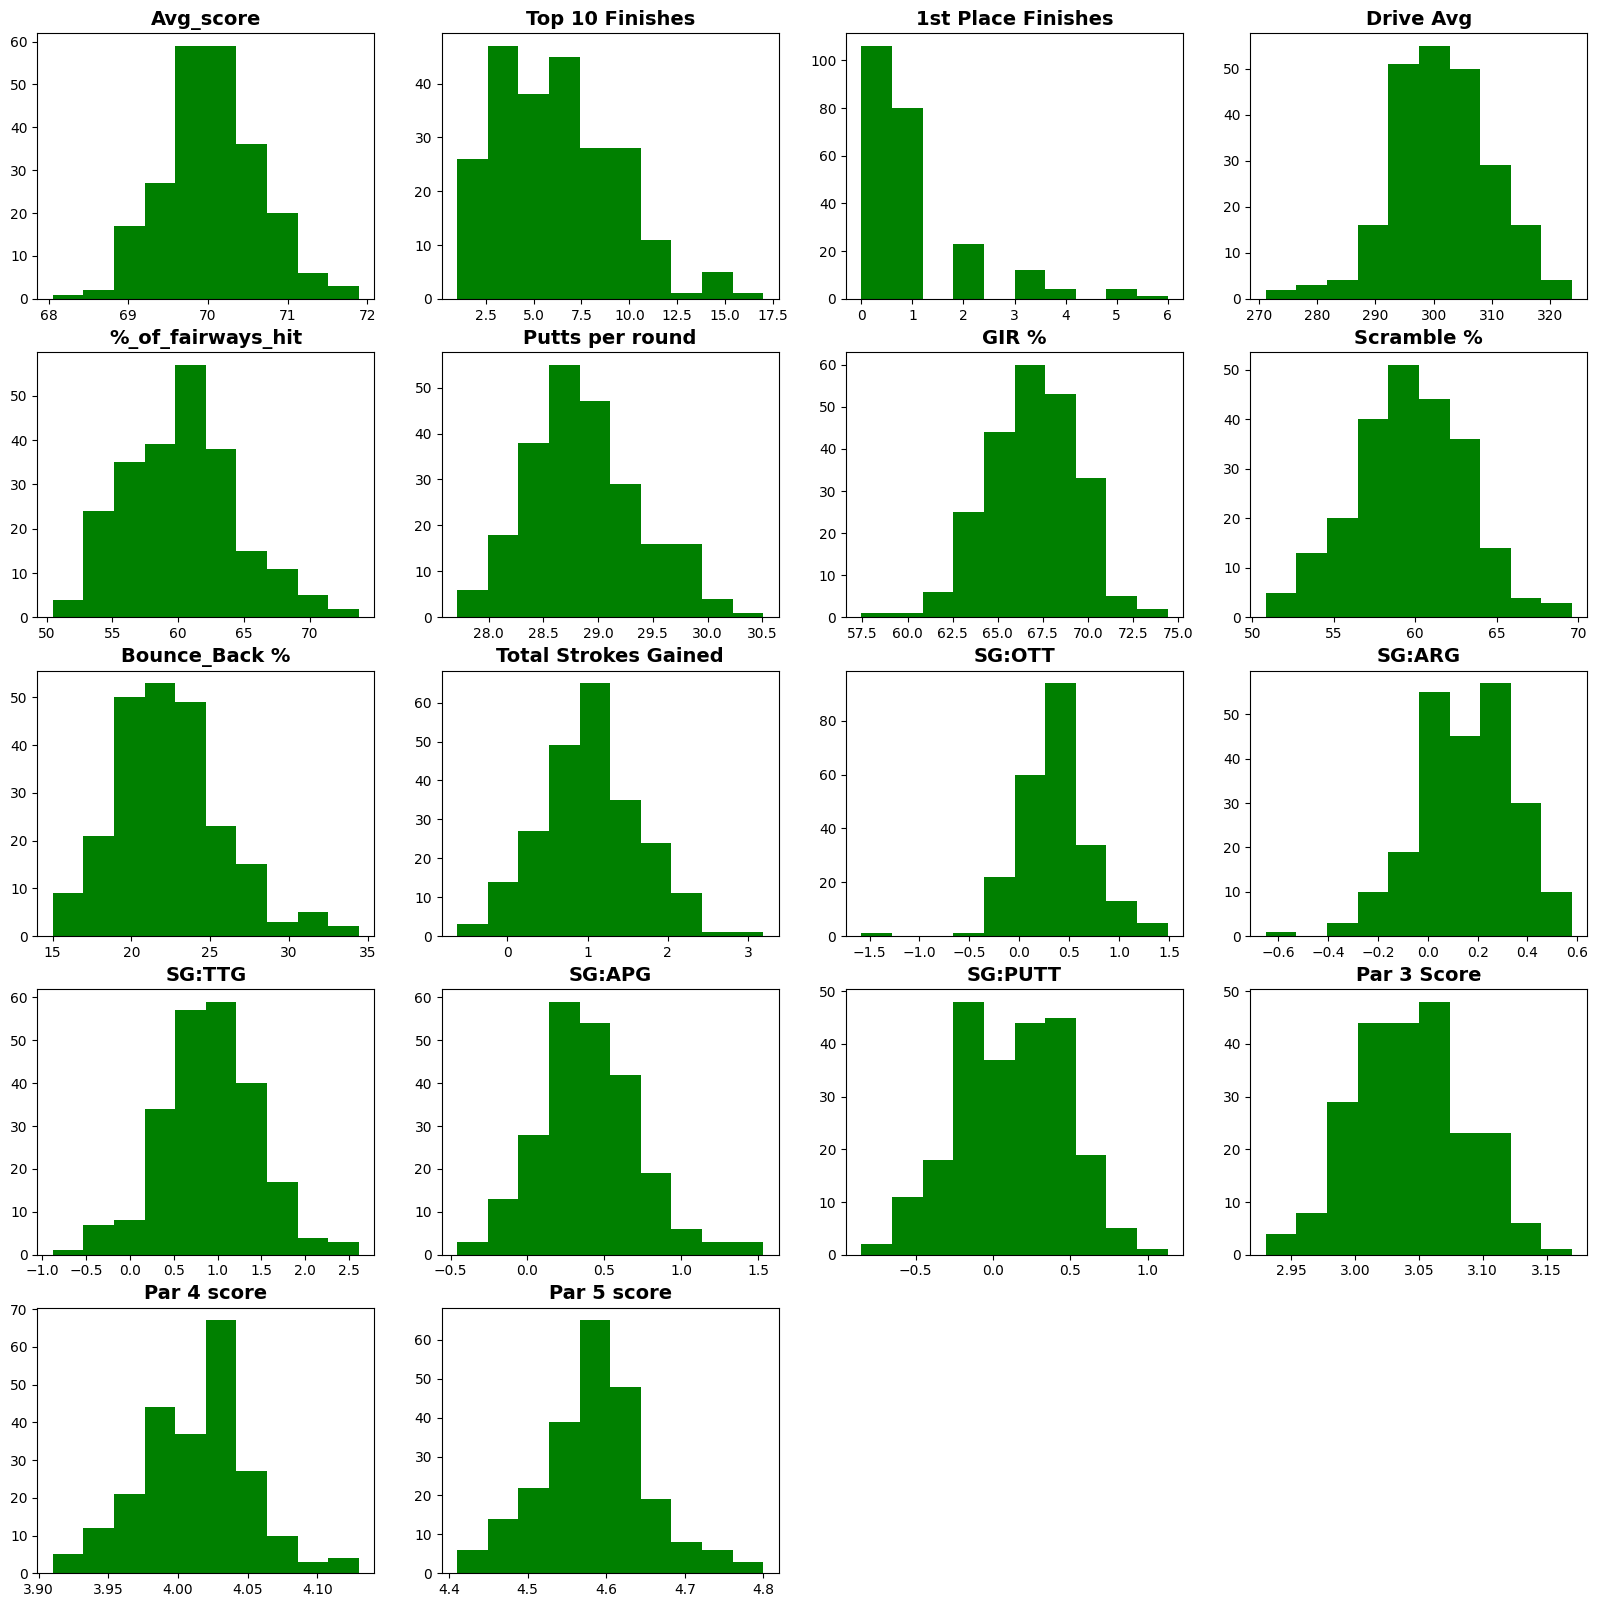

In [12]:
#Plot histogram to view distribution
plt.figure(figsize=(20,20))

for i in range(0, len(predictors)):
    plt.subplot(5,4,i+1)
    plt.gca().set_title(predictors[i], fontsize=14, fontweight='bold')
    plt.hist(pred_data.iloc[:,i], color = 'green')

plt.savefig('hist.png')

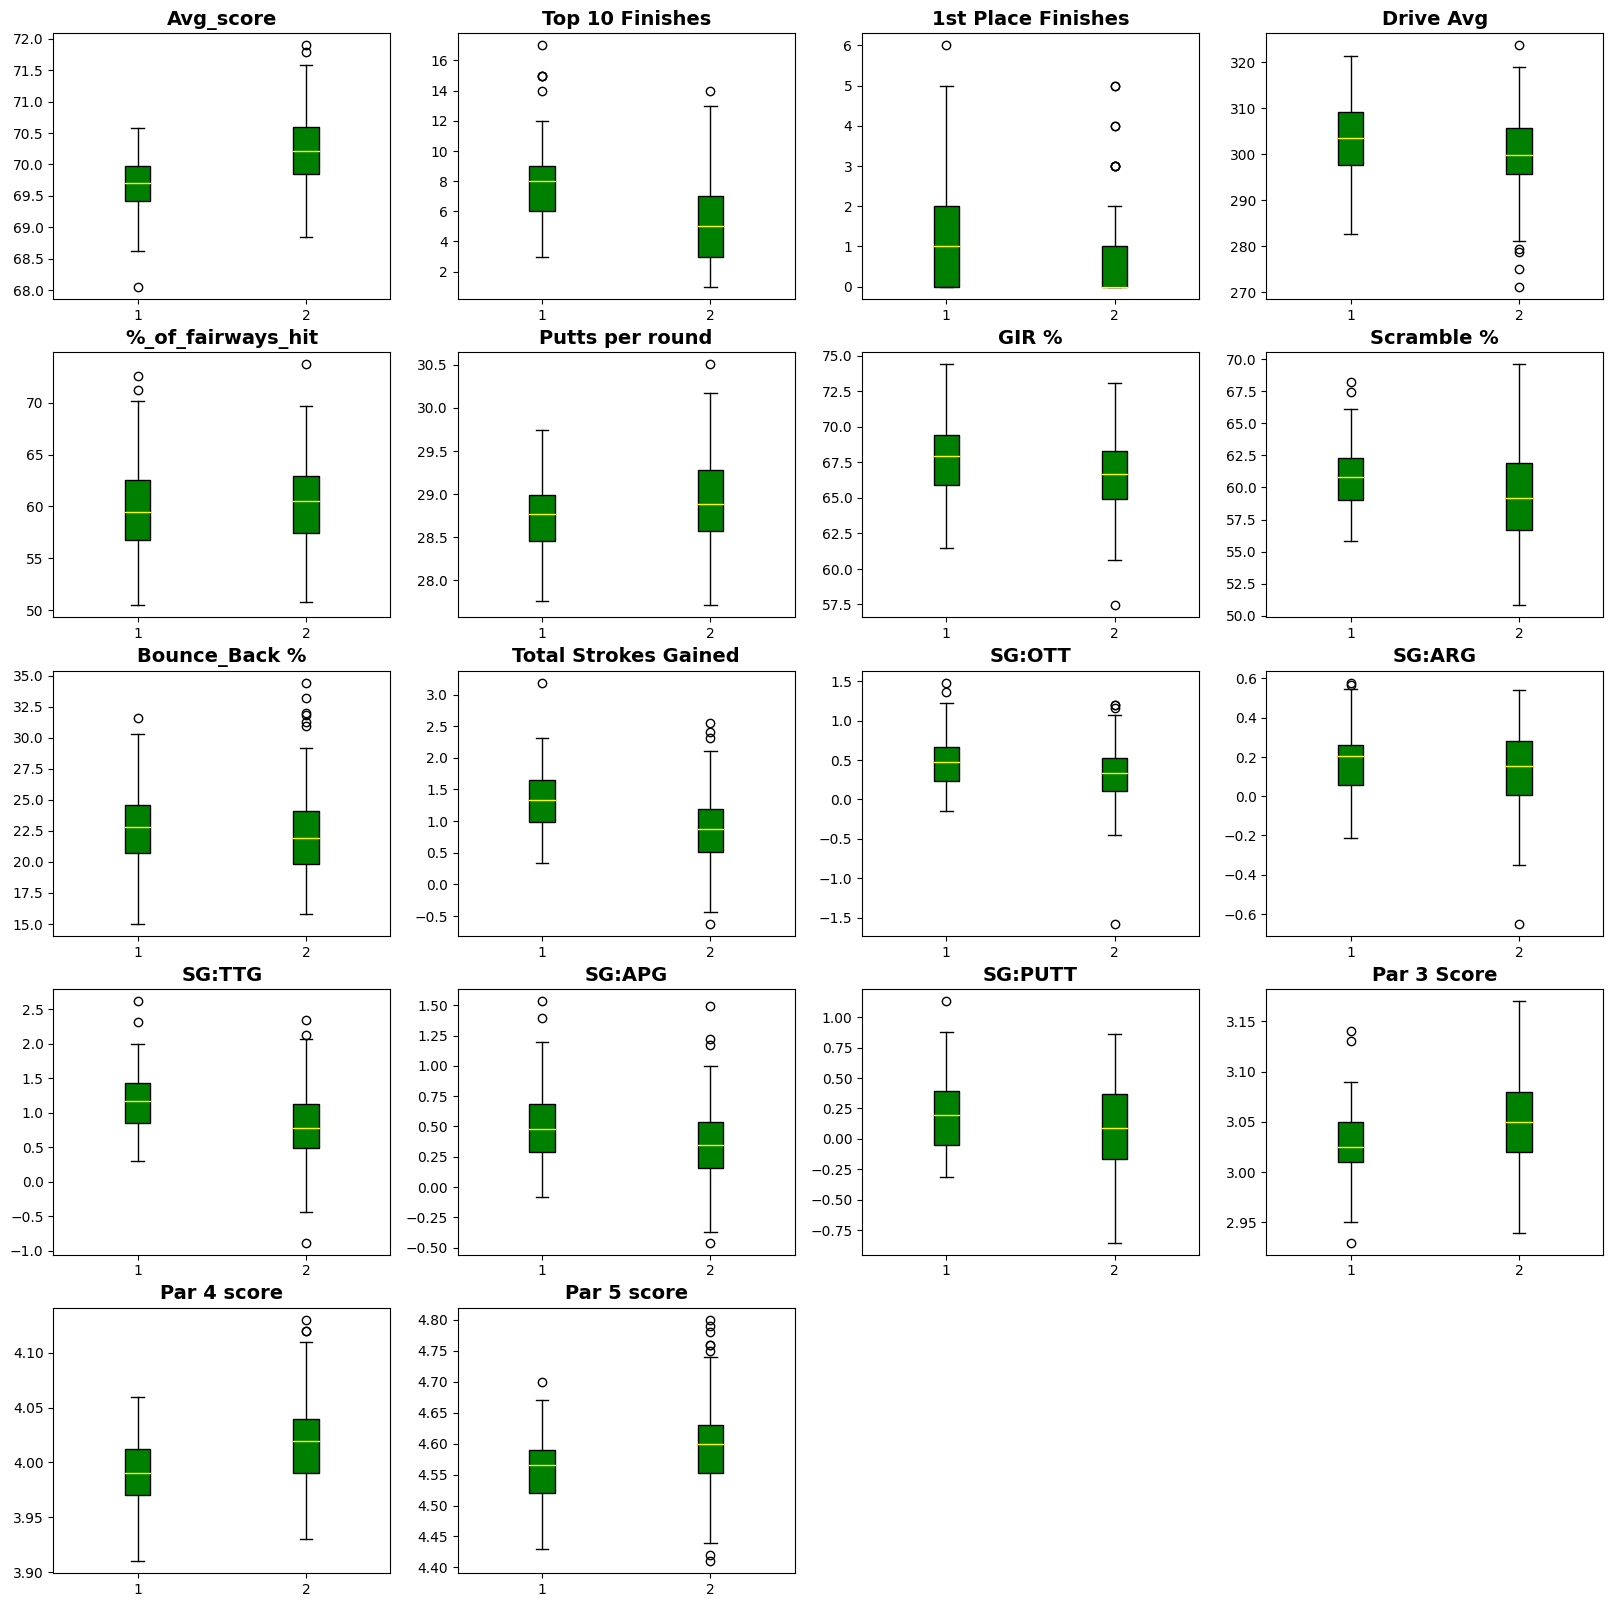

In [13]:
#Comparing Top 10 competitors to te rest of the field
plt.figure(figsize=(20,20))

for i in range(0, len(predictors)):
    plt.subplot(5,4,i+1)
    plt.gca().set_title(predictors[i], fontsize=14, fontweight='bold')
    x = masters_t10.iloc[:,i]
    y = rest.iloc[:,i]
    x_y = [x,y]
    plt.boxplot(x_y, patch_artist=True, medianprops = dict(color = 'yellow'), boxprops = dict(facecolor = 'green'))

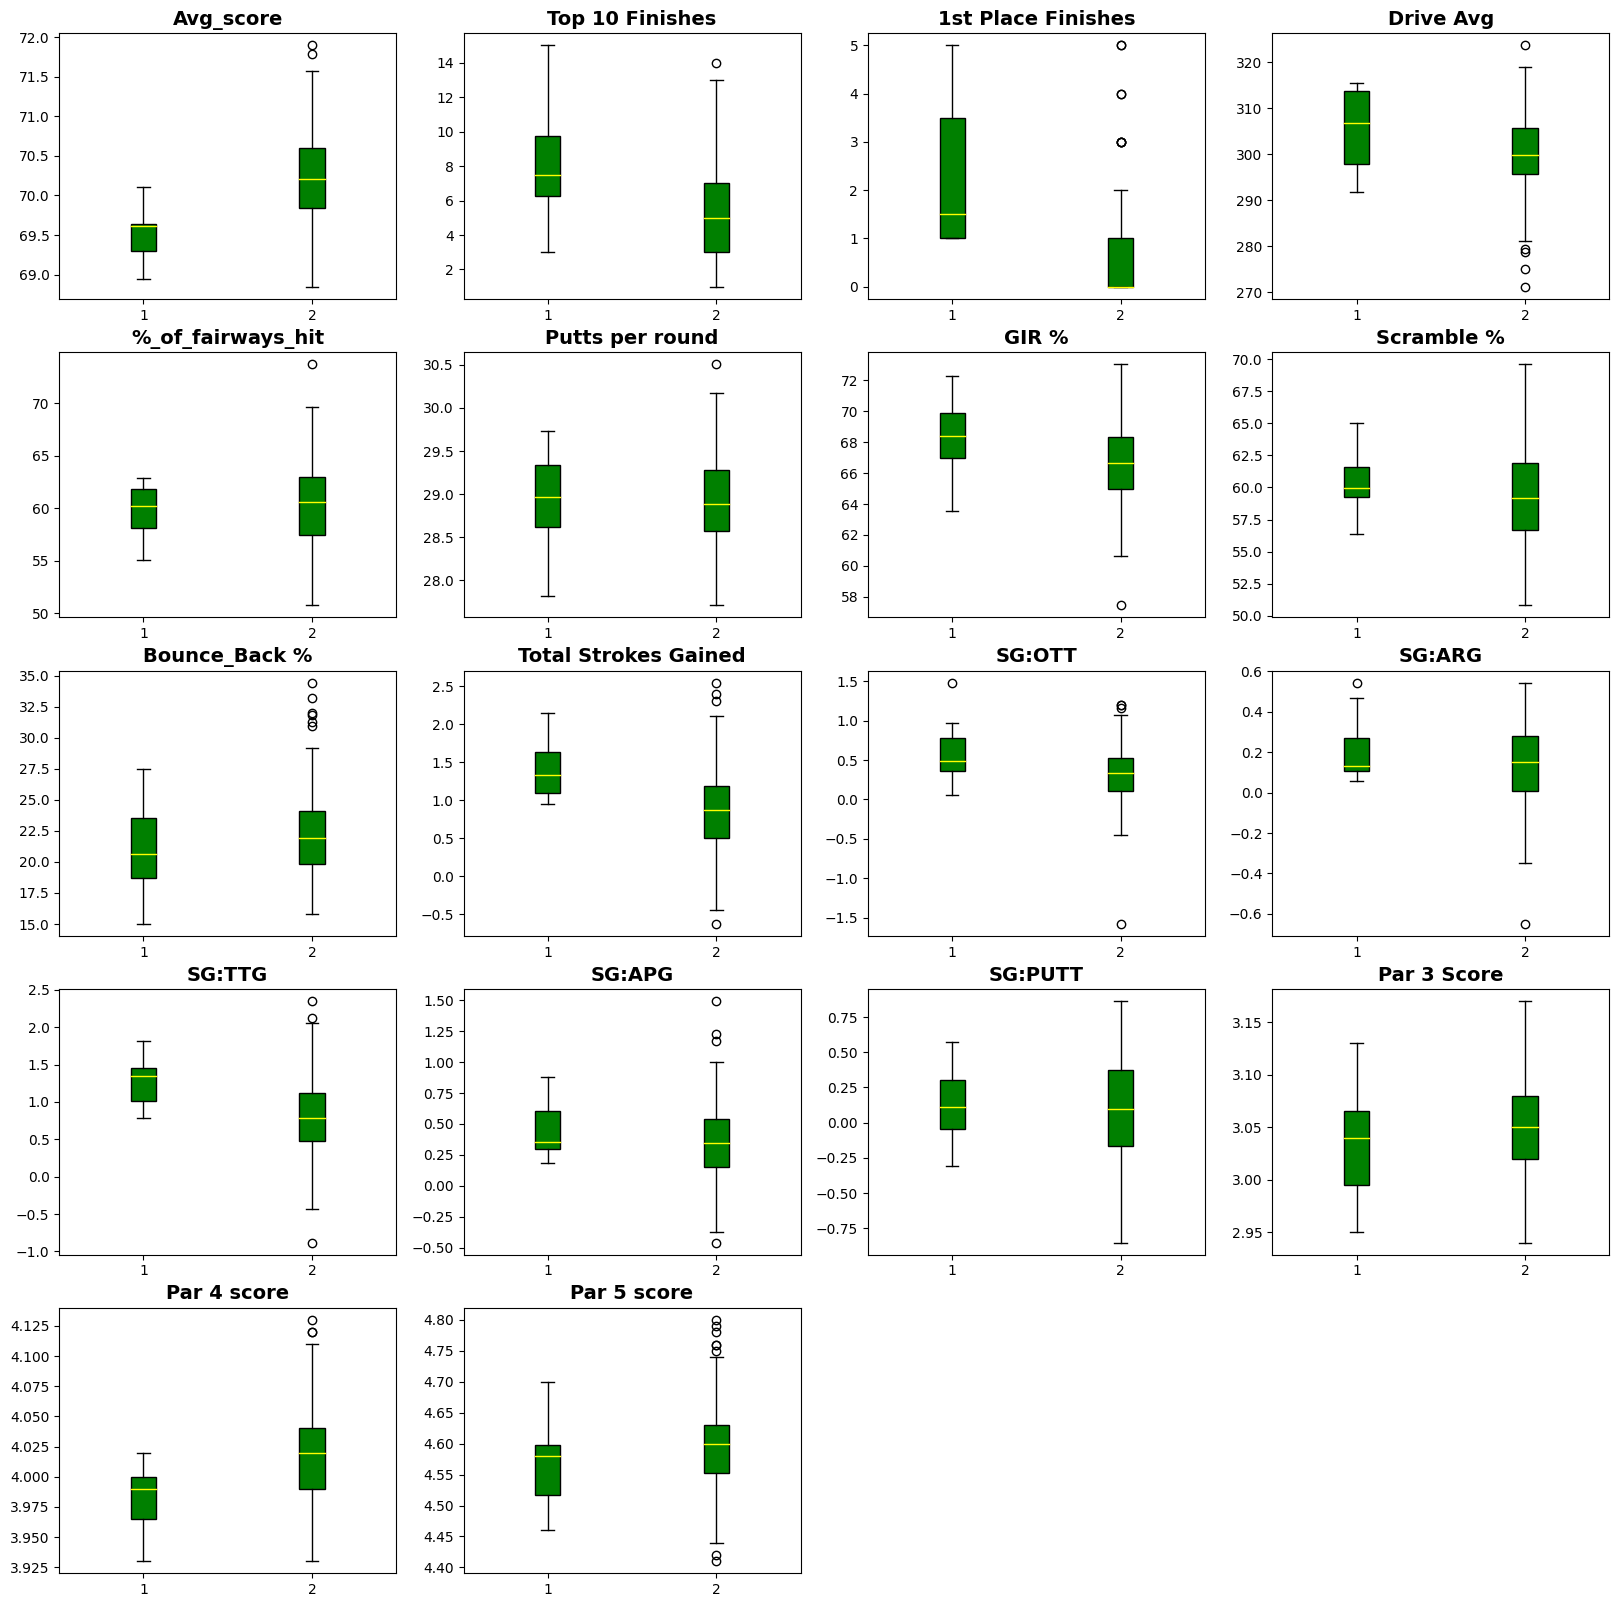

In [14]:
#Comparing Winners to the rest of the field
plt.figure(figsize=(20,20))

for i in range(0, len(predictors)):
    plt.subplot(5,4,i+1)
    plt.gca().set_title(predictors[i], fontsize=14, fontweight='bold')
    x = masters_winners.iloc[:,i]
    y = rest.iloc[:,i]
    x_y = [x,y]
    plt.boxplot(x_y, patch_artist=True, medianprops = dict(color = 'yellow'), boxprops = dict(facecolor = 'green'))
    
plt.savefig('box.png')

In [15]:
def winner(x):
    if x == 1:
        win = 1
    else:
        win = 0
    return win 

data['masters_win'] = data['Masters Finish'].apply(winner)

<Axes: xlabel='top_10_masters'>

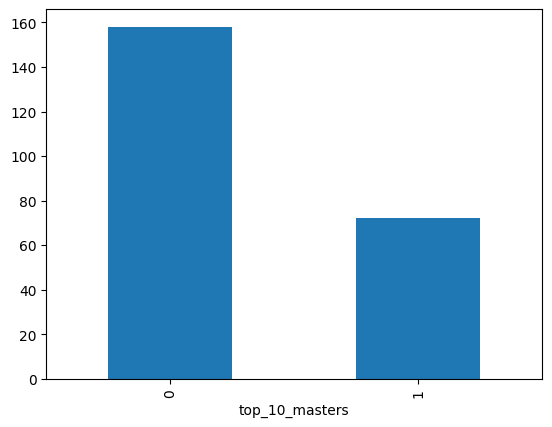

In [16]:
data['top_10_masters'].value_counts().plot(kind = 'bar')

<Axes: xlabel='masters_win'>

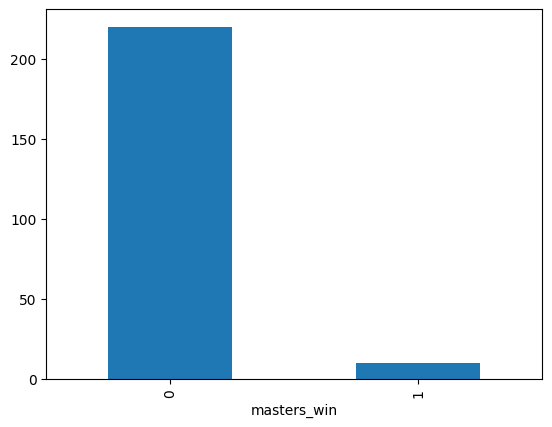

In [17]:
data['masters_win'].value_counts().plot(kind = 'bar')

In [18]:
predictors.remove('Top 10 Finishes')
predictors.remove('1st Place Finishes')
X = data[predictors]
y = data['masters_win']
    
#SMOTE and Random Undersampling
over = SMOTE(sampling_strategy=0.1, k_neighbors = 3)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X, y)
    
#Run Model
randomforest = RandomForestClassifier()
model = randomforest.fit(X_train, y_train)

pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','feature importance'])

,predictor,feature importance
0,Avg_score,0.253433
1,Drive Avg,0.029653
2,%_of_fairways_hit,0.064524
3,Putts per round,0.033271
4,GIR %,0.047483
5,Scramble %,0.023129
6,Bounce_Back %,0.050745
7,Total Strokes Gained,0.127927
8,SG:OTT,0.072963
9,SG:ARG,0.063059


In [19]:
#Predicting Top 10 no SMOTE or RandomUndersampling
pred_data.drop('Masters Finish', axis = 1)
training = data.loc[data['Year'] <= 2019]
test = data.loc[data['Year'] > 2019]
X_train = training[predictors]
y_train = training['top_10_masters']
X_test = test[predictors]
y_test = test['top_10_masters']

#Build Random Forest Model
randomforest = RandomForestClassifier()
model = randomforest.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

In [20]:
print('precision:', metrics.precision_score(y_test, y_test_pred))
print('recall:', metrics.recall_score(y_test, y_test_pred))
print('f1:', metrics.f1_score(y_test, y_test_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels = [0,1]), index = ['true:0', 'true:1'], columns = ['pred:0', 'pred:1']))

precision: 0.5
recall: 0.4642857142857143
f1: 0.4814814814814815
accuracy: 0.6781609195402298
        pred:0  pred:1
true:0      46      13
true:1      15      13


In [21]:
#Trying to predict Top 10 useing SMOTE and Random under sampling
training = data.loc[data['Year'] <= 2019]
test = data.loc[data['Year'] > 2019]
X_train = training[predictors]
y_train = training['top_10_masters']
X_test = test[predictors]
y_test = test['top_10_masters']

#SMOTE, works better with no k_neighbours due to the more balanced data
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.95)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#Build Model
X_train, y_train = pipeline.fit_resample(X_train, y_train)

randomforest = RandomForestClassifier()
model = randomforest.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
#Print Results
print('precision:', metrics.precision_score(y_test, y_test_pred))
print('recall:', metrics.recall_score(y_test, y_test_pred))
print('f1:', metrics.f1_score(y_test, y_test_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels = [0,1]), index = ['true:0', 'true:1'], columns = ['pred:0', 'pred:1']))

precision: 0.45454545454545453
recall: 0.7142857142857143
f1: 0.5555555555555556
accuracy: 0.632183908045977
        pred:0  pred:1
true:0      35      24
true:1       8      20


In [22]:
#Tuning SMOTE and RandomUnderSampling
#Trying to predict Top 10 useing SMOTE and Random under sampling
training = data.loc[data['Year'] <= 2019]
test = data.loc[data['Year'] > 2019]
X_train = training[predictors]
y_train = training['top_10_masters']
X_test = test[predictors]
y_test = test['top_10_masters']

#SMOTE
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('under', RandomUnderSampler()),
    ('classifier', RandomForestClassifier())
                    ])

param_grid = {
            'smote__sampling_strategy': [0.2,0.75,1.0],
            'smote__k_neighbors': [1, 3, 5],
            'under__sampling_strategy': [0.8,0.95, 1.0],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Best parameters found: ", grid_search.best_params_)
#Print Results
print('precision:', metrics.precision_score(y_test, y_test_pred))
print('recall:', metrics.recall_score(y_test, y_test_pred))
print('f1:', metrics.f1_score(y_test, y_test_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels = [0,1]), index = ['true:0', 'true:1'], columns = ['pred:0', 'pred:1']))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/utils/fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/opt/conda/lib/python3.10/si

Best parameters found:  {'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'smote__k_neighbors': 3, 'smote__sampling_strategy': 0.75, 'under__sampling_strategy': 1.0}
precision: 0.46511627906976744
recall: 0.7142857142857143
f1: 0.5633802816901409
accuracy: 0.6436781609195402
        pred:0  pred:1
true:0      36      23
true:1       8      20


In [23]:
years = [2011, 2012, 2013, 2014, 2015, 2017, 2018, 2021, 2022, 2023]

In [24]:
precision = []
recall = []
f1 = []
accuracy = []
pred_winners = []

for x in range(1, 21):
    for year in years:
        # Split the data into training and testing sets
        training = data.loc[data['Year'] != year]
        testing = data.loc[data['Year'] == year]
        
        if testing.empty:
            print(f"Skipping year {year} due to empty test set.")
            continue
        
        X_train = training[predictors]
        y_train = training['masters_win']
        X_test = testing[predictors]
        y_test = testing['masters_win']
        
        # Scale the data (fit on training data, transform both training and testing data)
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)
        
        # Apply SMOTE and RandomUnderSampler to the training data only
        over = SMOTE(sampling_strategy=0.1, k_neighbors=3)
        under = RandomUnderSampler(sampling_strategy=0.5)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        X_train_res, y_train_res = pipeline.fit_resample(X_train_std, y_train)
        
        # Train the model on the resampled training data
        randomforest = RandomForestClassifier()
        model = randomforest.fit(X_train_res, y_train_res)
        
        # Predict on the test data
        y_test_pred = model.predict(X_test_std)
        
        # Calculate performance metrics
        pre = metrics.precision_score(y_test, y_test_pred)
        rec = metrics.recall_score(y_test, y_test_pred)
        f = metrics.f1_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred)
        
        precision.append(pre)
        recall.append(rec)
        f1.append(f)
        accuracy.append(acc)
        
        # Calculate number of predicted winners
        my_list = y_test_pred.tolist()
        indices = [i for i, x in enumerate(my_list) if x == 1]
        pred_winners.append(len(indices))

# Print the average performance metrics
print('precision:', np.mean(precision))
print('recall:', np.mean(recall))
print('f1:', np.mean(f1))
print('accuracy:', np.mean(accuracy))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

precision: 0.09748412698412696
recall: 0.25
f1: 0.12926190476190474
accuracy: 0.7734365415840747


In [25]:
years = [2011, 2012, 2013, 2014, 2015, 2017, 2018, 2021, 2022, 2023]

In [26]:
precision = []
recall = []
f1 = []
accuracy = []
pred_winners = []

for x in range(1, 21):
    for year in years:
        # Split the data into training and testing sets
        training = data.loc[data['Year'] != year]
        testing = data.loc[data['Year'] == year]
        
        X_train = training[predictors]
        y_train = training['masters_win']
        X_test = testing[predictors]
        y_test = testing['masters_win']
        
        # Scale the data (fit on training data, transform both training and testing data)
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)
        
        # Apply SMOTE and RandomUnderSampler to the training data only
        over = SMOTE(sampling_strategy=0.2, k_neighbors= 3)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        X_train_res, y_train_res = pipeline.fit_resample(X_train_std, y_train)
        
        # Train the model on the resampled training data
        svc = SVC(kernel = 'linear')
        model = svc.fit(X_train_res, y_train_res)
        
        # Predict on the test data
        y_test_pred = model.predict(X_test_std)
        
        # Calculate performance metrics
        pre = metrics.precision_score(y_test, y_test_pred)
        rec = metrics.recall_score(y_test, y_test_pred)
        f = metrics.f1_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred)
        
        precision.append(pre)
        recall.append(rec)
        f1.append(f)
        accuracy.append(acc)
        
        # Calculate number of predicted winners
        my_list = y_test_pred.tolist()
        indices = [i for i, x in enumerate(my_list) if x == 1]
        pred_winners.append(len(indices))

# Print the average performance metrics
print('precision:', np.mean(precision))
print('recall:', np.mean(recall))
print('f1:', np.mean(f1))
print('accuracy:', np.mean(accuracy))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

precision: 0.19953373015873016
recall: 0.615
f1: 0.28035714285714286
accuracy: 0.7478852262011655


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
X = data[predictors]
y = data['masters_win']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test , y_train , y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 5)

over = SMOTE(sampling_strategy=0.5, k_neighbors = 3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [28]:
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('under', RandomUnderSampler()),
    ('classifier', SVC(kernel = 'linear'))
                    ])

param_grid = {
    'smote__sampling_strategy': [0.2, 0.6, 0.8],
    'smote__k_neighbors': [1, 3, 5],
    'under__sampling_strategy': [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Best parameters found: ", grid_search.best_params_)
#Print Results
print('precision:', metrics.precision_score(y_test, y_test_pred))
print('recall:', metrics.recall_score(y_test, y_test_pred))
print('f1:', metrics.f1_score(y_test, y_test_pred))
print('accuracy:', metrics.accuracy_score(y_test, y_test_pred))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels = [0,1]), index = ['true:0', 'true:1'], columns = ['pred:0', 'pred:1']))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'smote__k_neighbors': 3, 'smote__sampling_strategy': 0.6, 'under__sampling_strategy': 0.7}
precision: 0.0
recall: 0.0
f1: 0.0
accuracy: 0.8405797101449275
        pred:0  pred:1
true:0      58       7
true:1       4       0


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/utils/fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/opt/conda/lib/python3.10/site

In [29]:
years = [2011, 2012, 2013, 2014, 2015, 2017, 2018, 2021, 2022, 2023]

In [30]:
precision = []
recall = []
f1 = []
accuracy = []
pred_winners = []

for x in range(1, 21):
    for year in years:
        # Split the data into training and testing sets
        training = data.loc[data['Year'] != year]
        testing = data.loc[data['Year'] == year]
        
        X_train = training[predictors]
        y_train = training['masters_win']
        X_test = testing[predictors]
        y_test = testing['masters_win']
        
        # Scale the data (fit on training data, transform both training and testing data)
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)
        
        # Apply SMOTE and RandomUnderSampler to the training data only
        over = SMOTE(sampling_strategy=0.2, k_neighbors= 3)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        X_train_res, y_train_res = pipeline.fit_resample(X_train_std, y_train)
        
        # Train the model on the resampled training data
        svc = SVC(kernel = 'rbf')
        model = svc.fit(X_train_res, y_train_res)
        
        # Predict on the test data
        y_test_pred = model.predict(X_test_std)
        
        # Calculate performance metrics
        pre = metrics.precision_score(y_test, y_test_pred)
        rec = metrics.recall_score(y_test, y_test_pred)
        f = metrics.f1_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred)
        
        precision.append(pre)
        recall.append(rec)
        f1.append(f)
        accuracy.append(acc)
        
        # Calculate number of predicted winners
        my_list = y_test_pred.tolist()
        indices = [i for i, x in enumerate(my_list) if x == 1]
        pred_winners.append(len(indices))

# Print the average performance metrics
print('precision:', np.mean(precision))
print('recall:', np.mean(recall))
print('f1:', np.mean(f1))
print('accuracy:', np.mean(accuracy))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

precision: 0.1379166666666667
recall: 0.265
f1: 0.16859523809523808
accuracy: 0.8053416492320667


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(data['Masters Finish'])

3      36.0
19     25.0
22      2.0
23      8.0
24      1.0
       ... 
752    32.0
753    35.0
755     9.0
759    58.0
761    51.0
Name: Masters Finish, Length: 230, dtype: float64


In [32]:
#Prediciting 2024 winner
training = data
test = data2024
X_train = training[predictors]
y_train = training['masters_win']
X_test = test[predictors]

# Scale the data (fit on training data, transform both training and testing data)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
        
# Apply SMOTE and RandomUnderSampler to the training data only
over = SMOTE(sampling_strategy=0.2, k_neighbors= 3)
under = RandomUnderSampler(sampling_strategy = 0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_mod, y_train_mod = pipeline.fit_resample(X_train_std, y_train)
        
# Train the model on the resampled training data
svc = SVC(kernel = 'linear', probability = True)
model = svc.fit(X_train_mod, y_train_mod)

y_pred = model.predict(X_test_std)
y_pred_proba = model.predict_proba(X_test_std)

#Add Predictions to DF
data2024['masters_prediction'] = y_pred.tolist()


        

In [33]:
#Show player with highest predicted probability
probs = []
for i in range(0, len(y_pred_proba)):
    prob = y_pred_proba[i,1]
    probs.append(prob)
    
data2024['prob'] = probs

index = probs.index(np.max(probs))
loc = X_test.iloc[index,:]['Avg_score']
data2024.loc[data2024['Avg_score'] == loc]

,Player Name,Avg_score,Year,Top 10 Finishes,1st Place Finishes,Drive Avg,%_of_fairways_hit,Putts per round,GIR %,Scramble %,...,SG:OTT,SG:ARG,SG:TTG,SG:APG,SG:PUTT,Par 3 Score,Par 4 score,Par 5 score,masters_prediction,prob
561,Rory McIlroy,69.803,2024,6.0,2.0,319.0,60.94,28.49,65.66,63.4,...,0.781,0.313,1.401,0.308,0.109,3.03,3.99,4.58,1,0.959052


In [34]:
winners = data2024.loc[data2024['masters_prediction'] == 1]
winners

,Player Name,Avg_score,Year,Top 10 Finishes,1st Place Finishes,Drive Avg,%_of_fairways_hit,Putts per round,GIR %,Scramble %,...,SG:OTT,SG:ARG,SG:TTG,SG:APG,SG:PUTT,Par 3 Score,Par 4 score,Par 5 score,masters_prediction,prob
158,Chris Kirk,70.990,2024,2.0,1.0,296.8,63.21,28.70,64.64,60.10,...,0.287,0.078,0.540,0.174,-0.434,3.08,3.99,4.65,1,0.509077
164,Collin Morikawa,69.705,2024,7.0,0.0,293.8,70.36,27.85,64.76,65.88,...,0.434,0.425,1.119,0.259,0.188,3.00,3.97,4.56,1,0.455720
339,Jordan Spieth,70.844,2024,3.0,0.0,306.9,62.45,28.61,65.87,53.95,...,0.500,-0.024,0.271,-0.204,-0.006,3.11,4.00,4.63,1,0.721285
380,Justin Thomas,70.266,2024,5.0,0.0,308.4,55.51,28.60,64.24,60.73,...,0.133,0.419,1.105,0.552,-0.435,3.02,4.01,4.55,1,0.745218
468,Min Woo Lee,70.597,2024,2.0,0.0,315.0,59.55,29.02,64.08,55.20,...,0.731,0.090,0.517,-0.304,-0.093,3.13,4.00,4.53,1,0.746852
561,Rory McIlroy,69.803,2024,6.0,2.0,319.0,60.94,28.49,65.66,63.40,...,0.781,0.313,1.401,0.308,0.109,3.03,3.99,4.58,1,0.959052
746,Xander Schauffele,68.914,2024,13.0,2.0,306.9,61.88,28.30,70.07,70.91,...,0.582,0.224,1.618,0.812,0.617,2.94,3.92,4.49,1,0.422811


In [35]:
dubs = []

for i in range(0,1000):
    #Split Data
    training = data
    test = data2024
    X_train = training[predictors]
    y_train = training['masters_win']
    X_test = test[predictors]

    
    #Standardize Predictors
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)
    
    #SMOTE and Undersampling
    over = SMOTE(sampling_strategy=0.2, k_neighbors = 3)
    under = RandomUnderSampler(sampling_strategy=0.5)

    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    X_train_mod, y_train_mod = pipeline.fit_resample(X_train_std, y_train)
    
    #Train Model
    svc = SVC(kernel = 'linear', probability = True)
    model = svc.fit(X_train_mod, y_train_mod)

    y_pred = model.predict(X_test_std)
    y_pred_proba = model.predict_proba(X_test_std)

    #Add Predictions to DF
    data2024['masters_prediction'] = y_pred.tolist()

    probs = []
    for i in range(0, len(y_pred_proba)):
        prob = y_pred_proba[i,1]
        probs.append(prob)
        
    data2024['prob'] = probs

    winners = data2024['Player Name'].loc[data2024['masters_prediction'] == 1].to_list()
    dubs.append(winners)

In [36]:
#Format Results
flat_list = []
for sublist in dubs:
    for item in sublist:
        flat_list.append(item)
        
results = Counter(flat_list)

collections.OrderedDict(sorted(results.items(), reverse=True, key=lambda t: t[1]))

OrderedDict([('Rory McIlroy', 1000),
             ('Min Woo Lee', 993),
             ('Xander Schauffele', 960),
             ('Justin Thomas', 881),
             ('Scottie Scheffler', 838),
             ('Jordan Spieth', 810),
             ('Wyndham Clark', 588),
             ('Ludvig Åberg', 506),
             ('Chris Kirk', 307),
             ('Tommy Fleetwood', 190),
             ('Adam Scott', 175),
             ('Collin Morikawa', 145),
             ('Ryo Hisatsune', 61),
             ('Hideki Matsuyama', 47),
             ('Byeong Hun An', 43),
             ('Jason Day', 26),
             ('Peter Malnati', 25),
             ('Stephan Jaeger', 20),
             ('Tony Finau', 13),
             ('Ryan Fox', 10),
             ('Corey Conners', 5),
             ('Shane Lowry', 4),
             ('Viktor Hovland', 1),
             ('Sepp Straka', 1),
             ('Erik van Rooyen', 1)])

In [37]:
#JT: 12-1
#PR: 30-1
#RM: 13-1
#SS: 60-1
#TF: 30-1

recall = 0.61

#Odds at the beginning of Masters week
multiplier = [12, 30, 13, 60, 30]

#$20 on each predicted winner
bet = 20
winnings = []

for x in multiplier:
    w = bet*x
    winnings.append(w)

avg_winnings = np.mean(winnings)

EV = ((avg_winnings * recall) - (bet*len(multiplier))) + ((-bet*len(multiplier)) * (1-recall))

In [38]:
EV

214.8